In [30]:
# Library Utilitaire pour la gestion de projet
import PythonLib
# Database
import pymongo
from pymongo import MongoClient
# Data manipulation
import pandas as pd

Prepare the database client to makes queries, and collect the dataset we need.

In [31]:
mongo_host='ns396089.ip-37-59-38.eu'
mongo_port=32771

author= "Mark S. Daskin"
topic = "NETWORK-AND-DISCRETE-LOCATION"

client = MongoClient(mongo_host, mongo_port)

# Collection where we wich to store our problem
problems = client[topic][author] # client.[db name].[collection name]

Query one dataset and select it based on the metadatas

In [32]:
# fetch all problems, return an iterator
q = {
  'metadata': {
    'author': "Mark S. Daskin",
    'topic': "NETWORK-AND-DISCRETE-LOCATION",
    'dataset':"49-nodes"
  }
} # query select the desired intances
f = {} # filter | select the desired fields
record = problems.find_one(q)

Reformat the dataset to be easy to use via **pandas**

In [33]:
df= pd.DataFrame.from_dict(record["data"])
df= df.set_index(['ID'])
df.head()

,LATITUDE,LONGITUDE,STATE POP,CITY POP,FIXED COST,CITY
ID,,,,,,
1,121.467360,38.566850,29760021,369365,115800,< Sacramento CA >
2,73.799017,42.665750,17990455,101082,101800,< Albany NY >
11,84.422592,33.762900,6478216,394017,71200,< Atlanta GA >
12,77.474584,37.531050,6187358,203056,66600,< Richmond VA >
13,71.017892,42.336029,6016425,574283,161400,< Boston MA >


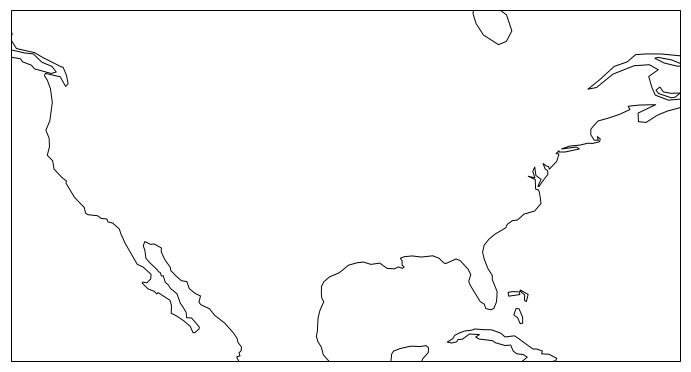

In [50]:
import matplotlib.pyplot as plt

from IPython.display import Image
%matplotlib inline
# Cqrtogrophy librqry for maps background
import cartopy.crs as ccrs

crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(12, 10),
    subplot_kw=dict(projection=crs))
ax.coastlines()
# Extent of continental US.
ax.set_extent([-128, -62, 20, 50])

Create the network representation using the dataset with the tool networkx

In [61]:
import networkx as nx
G   = nx.Graph()

for index, row in df.iterrows():
    G.add_node(index, pos=(-row["LONGITUDE"],row["LATITUDE"]),color=row["FIXED COST"],node_size=row["CITY POP"])

Overlap the network and the map for a better visualisation

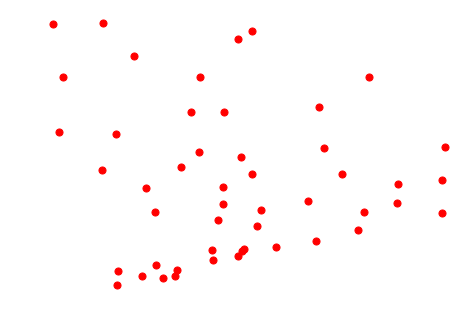

In [66]:


nx.draw(G, nx.get_node_attributes(G,'pos'), node_size=50)